In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
import scipy as sp

## Import PPO Results

In [2]:
import re
import csv

# Define a regular expression pattern to match relevant lines
pattern = r'score : ([\d.]+), steps : (\d+), progress : ([\d.]+)%'

# Open the input text file and the output CSV file
with open('../vista_nautilus/results/CNN/minimal_ppo_trial3_47.txt', 'r') as infile, open('ppo_trial3.csv', 'w', newline='') as outfile:
    csv_writer = csv.writer(outfile)
    csv_writer.writerow(['reward', 'steps', 'progress'])  # Write CSV header

    lines = infile.readlines()
    for i in range(len(lines)):
        match = re.search(pattern, lines[i])
        if match:
            reward = float(match.group(1))
            steps = int(match.group(2))
            progress = float(match.group(3))

            csv_writer.writerow([reward, steps, progress])

print("CSV file has been created.")

CSV file has been created.


In [3]:
ppo1 = pd.read_csv("../vista_nautilus/results/CNN/minimal_ppo_trial2_47.txt",sep='\t')
ppo1['trial'] = 1
ppo1 = ppo1.reset_index()
ppo1 = ppo1.rename(columns={"index":"Episode"})

ppo2 = pd.read_csv("ppo_trial3.csv")
ppo2['trial'] = 2
ppo2 = ppo2.reset_index()
ppo2 = ppo2.rename(columns={"index":"Episode"})

ppo3 = pd.read_csv("../vista_nautilus/results/CNN/minimal_ppo_trial4_47.txt",sep='\t')
ppo3['trial'] = 3
ppo3 = ppo3.reset_index()
ppo3 = ppo3.rename(columns={"index":"Episode"})

ppo4 = pd.read_csv("../vista_nautilus/results/CNN/minimal_ppo_trial5_47.txt",sep='\t')
ppo4['trial'] = 4
ppo4 = ppo4.reset_index()
ppo4 = ppo4.rename(columns={"index":"Episode"})

ppo_df = pd.concat([ppo1, ppo2, ppo3, ppo4])
ppo_df["Algorithm"] = "PPO"
ppo_df["Model"] = "CNN"

ppo_df = ppo_df.groupby('Episode')['reward'].mean()
ppo_df = ppo_df.to_frame().reset_index()
ppo_df["Algorithm"] = "PPO"
ppo_df["Model"] = "CNN"
ppo_df['Average Reward'] = ppo_df['reward'].rolling(window=10).mean()

## Import A2C Results

In [4]:
a2c1 = pd.read_csv("../vista_nautilus/results/CNN/a2c_aug10cnn2_3worker_9th_trial_s47.txt",sep='\t')
a2c1['trial'] = 1
a2c1 = a2c1.reset_index()
a2c1 = a2c1.rename(columns={"index":"Episode"})

a2c2 = pd.read_csv("../vista_nautilus/results/CNN/a2c_aug9cnn2_3worker_6th_trial_s47.txt",sep='\t')
a2c2['trial'] = 2
a2c2 = a2c2.reset_index()
a2c2 = a2c2.rename(columns={"index":"Episode"})

a2c3 = pd.read_csv("../vista_nautilus/results/CNN/a2c_aug10cnn2_3worker_9th_trial_s47.txt",sep='\t')
a2c3['trial'] = 3
a2c3 = a2c3.reset_index()
a2c3 = a2c3.rename(columns={"index":"Episode"})

a2c4 = pd.read_csv("../vista_nautilus/results/CNN/a2c_aug10cnn2_3worker_10th_trial_s47.txt",sep='\t')
a2c4['trial'] = 4
a2c4 = a2c4.reset_index()
a2c4 = a2c4.rename(columns={"index":"Episode"})

a2c_df = pd.concat([a2c1, a2c2, a2c3, a2c4])
a2c_df["Algorithm"] = "A2C"
a2c_df["Model"] = "CNN"

a2c_df = a2c_df.groupby('Episode')['reward'].mean()
a2c_df = a2c_df.to_frame().reset_index()
a2c_df["Algorithm"] = "A2C"
a2c_df["Model"] = "CNN"
a2c_df['Average Reward'] = a2c_df['reward'].rolling(window=10).mean()

## Import REINFORCE results

In [5]:
reinforce1 = pd.read_csv("../vista_nautilus/results/CNN/collision7.txt",sep='\t')
reinforce1['trial'] = 1
reinforce1 = reinforce1.reset_index()
reinforce1 = reinforce1.rename(columns={"index":"Episode"})
reinforce1 = reinforce1.reset_index()
reinforce1 = reinforce1.rename(columns={"index":"Episode",
                                        "Episode":"reward",
                                        "reward":"steps",
                                        "progress":"trace"})
# vreinforce1 = reinforce1.rename(columns={"index":"Episode"})

reinforce2 = pd.read_csv("../vista_nautilus/results/CNN/collision10.txt",sep='\t')
reinforce2['trial'] = 2
reinforce2 = reinforce2.reset_index()
reinforce2 = reinforce2.rename(columns={"index":"Episode"})
reinforce2 = reinforce2.reset_index()
reinforce2 = reinforce2.rename(columns={"index":"Episode",
                                        "Episode":"reward",
                                        "reward":"steps",
                                        "progress":"trace"})

reinforce3 = pd.read_csv("../vista_nautilus/results/CNN/collision8.txt",sep='\t')
reinforce3['trial'] = 3
reinforce3 = reinforce3.reset_index()
reinforce3 = reinforce3.rename(columns={"index":"Episode"})
reinforce3 = reinforce3.reset_index()
reinforce3 = reinforce3.rename(columns={"index":"Episode",
                                        "Episode":"reward",
                                        "reward":"steps",
                                        "progress":"trace"})

reinforce4 = pd.read_csv("../vista_nautilus/results/CNN/collision9.txt",sep='\t')
reinforce4['trial'] = 4
reinforce4 = reinforce4.reset_index()
reinforce4 = reinforce4.rename(columns={"index":"Episode"})
reinforce4 = reinforce4.reset_index()
reinforce4 = reinforce4.rename(columns={"index":"Episode",
                                        "Episode":"reward",
                                        "reward":"steps",
                                        "progress":"trace"})

reinforce_df = pd.concat([reinforce1, reinforce2, reinforce3, reinforce4])
reinforce_df["Algorithm"] = "REINFORCE"
reinforce_df["Model"] = "CNN"

reinforce_df = reinforce_df.groupby('Episode')['reward'].mean()
reinforce_df = reinforce_df.to_frame().reset_index()
reinforce_df["Algorithm"] = "REINFORCE"
reinforce_df["Model"] = "CNN"
reinforce_df['Average Reward'] = reinforce_df['reward'].rolling(window=10).mean()

In [6]:
df_cnn = pd.concat([ppo_df, a2c_df[:250],reinforce_df[:250]]).reset_index()

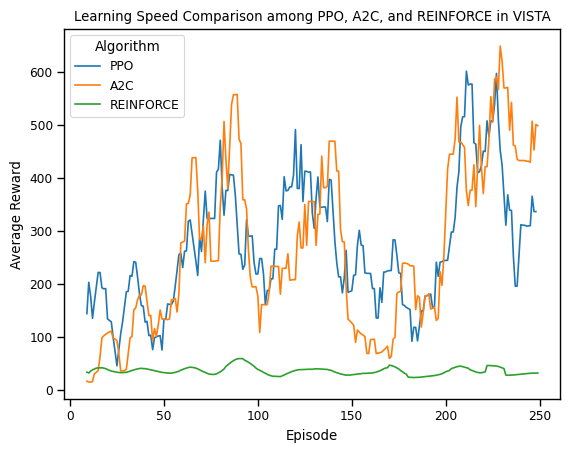

In [7]:
cnn_benchmark1 = sns.lineplot(data=df_cnn,x="Episode",y="Average Reward",hue="Algorithm").set_title("Learning Speed Comparison among PPO, A2C, and REINFORCE in VISTA")
fig = cnn_benchmark1.get_figure()
fig.savefig("../vista_nautilus/results/figures/b1.png") 

## Import ViT results

In [8]:
ppo_vit1 = pd.read_csv("../vista_nautilus/results/CNN/ppo_vit_trial1.txt",sep='\t')
ppo_vit1['trial'] = 1
ppo_vit1 = ppo_vit1.reset_index()
ppo_vit1 = ppo_vit1.rename(columns={"index":"Episode"})

ppo_vit2 = pd.read_csv("../vista_nautilus/results/CNN/ppo_vit_trial2.txt",sep='\t')
ppo_vit2['trial'] = 2
ppo_vit2 = ppo_vit2.reset_index()
ppo_vit2 = ppo_vit2.rename(columns={"index":"Episode"})

ppo_vit3 = pd.read_csv("../vista_nautilus/results/CNN/ppo_vit_trial3.txt",sep='\t')
ppo_vit3['trial'] = 3
ppo_vit3 = ppo_vit3.reset_index()
ppo_vit3 = ppo_vit3.rename(columns={"index":"Episode"})

ppo_vit4 = pd.read_csv("../vista_nautilus/results/CNN/ppo_vit_trial4.txt",sep='\t')
ppo_vit4['trial'] = 4
ppo_vit4 = ppo_vit4.reset_index()
ppo_vit4 = ppo_vit4.rename(columns={"index":"Episode"})

ppo_vit_df = pd.concat([ppo_vit1, ppo_vit2, ppo_vit3, ppo_vit4])
ppo_vit_df["Algorithm"] = "PPO"
ppo_vit_df["Model"] = "AC_ViT"

ppo_vit_df = ppo_vit_df.groupby('Episode')['reward'].mean()
ppo_vit_df = ppo_vit_df.to_frame().reset_index()
ppo_vit_df["Algorithm"] = "PPO"
ppo_vit_df["Model"] = "AC_ViT"
ppo_vit_df['Average Reward'] = ppo_vit_df['reward'].rolling(window=10).mean()

In [9]:
a2c1_vit = pd.read_csv("../vista_nautilus/results/CNN/a2c_vit_trial1.txt",sep='\t')
a2c1_vit['trial'] = 1
a2c1_vit = a2c1_vit.reset_index()
a2c1_vit = a2c1_vit.rename(columns={"index":"Episode"})

a2c2_vit = pd.read_csv("../vista_nautilus/results/CNN/a2c_vit_trial2.txt",sep='\t')
a2c2_vit['trial'] = 2
a2c2_vit = a2c2_vit.reset_index()
a2c2_vit = a2c2_vit.rename(columns={"index":"Episode"})

a2c3_vit = pd.read_csv("../vista_nautilus/results/CNN/a2c_vit_trial3.txt",sep='\t')
a2c3_vit['trial'] = 3
a2c3_vit = a2c3_vit.reset_index()
a2c3_vit = a2c3_vit.rename(columns={"index":"Episode"})

a2c4_vit = pd.read_csv("../vista_nautilus/results/CNN/a2c_vit_trial4.txt",sep='\t')
a2c4_vit['trial'] = 4
a2c4_vit = a2c4_vit.reset_index()
a2c4_vit = a2c4_vit.rename(columns={"index":"Episode"})

a2c_df_vit = pd.concat([a2c1_vit[:250], a2c2_vit[:250], a2c3_vit[:250], a2c4_vit[:250]])
a2c_df_vit["Algorithm"] = "A2C"
a2c_df_vit["Model"] = "AC_ViT"

a2c_df_vit = a2c_df_vit.groupby('Episode')['reward'].mean()
a2c_df_vit = a2c_df_vit.to_frame().reset_index()
a2c_df_vit["Algorithm"] = "A2C"
a2c_df_vit["Model"] = "AC_ViT"
a2c_df_vit['Average Reward'] = a2c_df_vit['reward'].rolling(window=10).mean()

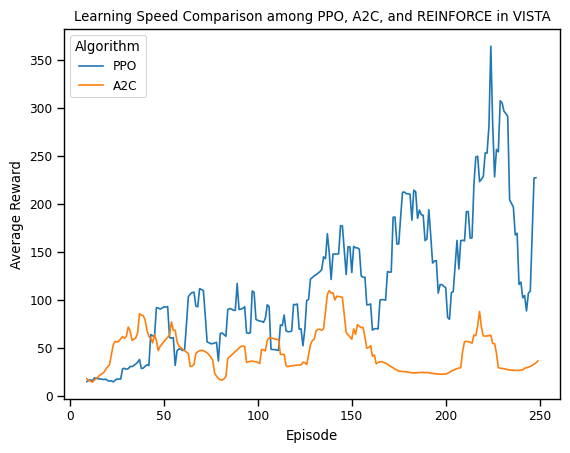

In [10]:
df_vit = pd.concat([ppo_vit_df, a2c_df_vit]).reset_index()
vit_benchmark1 = sns.lineplot(data=df_vit,x="Episode",y="Average Reward",hue="Algorithm").set_title("Learning Speed Comparison among PPO, A2C, and REINFORCE in VISTA")
# fig = cnn_benchmark1.get_figure()
# fig.savefig("../vista_nautilus/results/figures/b1.png") 

## Combine Results

In [19]:
df = pd.concat([df_vit, df_cnn])
df.to_csv("b1.csv")
df

,index,Episode,reward,Algorithm,Model,Average Reward
0,0,0,25.336650,PPO,AC_ViT,NaN
1,1,1,12.505650,PPO,AC_ViT,NaN
2,2,2,19.316350,PPO,AC_ViT,NaN
3,3,3,13.493575,PPO,AC_ViT,NaN
4,4,4,10.216150,PPO,AC_ViT,NaN
...,...,...,...,...,...,...
744,245,245,32.634450,REINFORCE,CNN,31.334485
745,246,246,31.237425,REINFORCE,CNN,31.437985
746,247,247,31.950675,REINFORCE,CNN,31.582287
747,248,248,32.553925,REINFORCE,CNN,31.749722


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

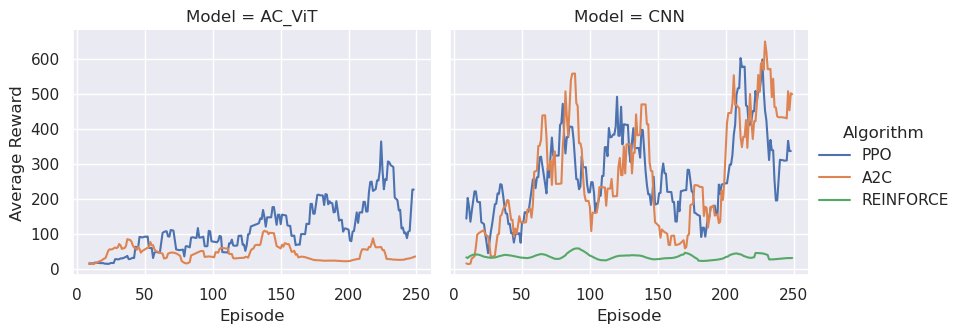

In [17]:
g = sns.FacetGrid(df, col="Model", hue="Algorithm", height=3.5, aspect=1.2)
g.map_dataframe(sns.lineplot, x="Episode", y="Average Reward")
g.add_legend()
g.savefig("../vista_nautilus/results/figures/model_facet2.pdf") 

## Stats

In [295]:
r, p = sp.stats.pearsonr(ppo_vit_df['Episode'], ppo_vit_df['reward'])
r, p

(0.38727177477107133, 2.467688196713377e-10)

In [297]:
a2c_vit_df250 = a2c_df_vit[:250]
r, p = sp.stats.pearsonr(a2c_vit_df250['Episode'], a2c_vit_df250['reward'])
r, p

(-0.059085672048851026, 0.3521859215350367)

In [234]:
r, p = sp.stats.pearsonr(ppo_df['Episode'], ppo_df['reward'])
print(f"r: {r}, p: {p}")

r: 0.17527555048985066, p: 0.005547614043887023


In [235]:
a2c_df250 = a2c_df[:250]
r, p = sp.stats.pearsonr(a2c_df250['Episode'], a2c_df250['reward'])
print(f"r: {r}, p: {p}")

r: 0.29805067547862196, p: 1.598723754246416e-06


In [236]:
reinforce_df250 = reinforce_df[:250]
r, p = sp.stats.pearsonr(reinforce_df250['Episode'], reinforce_df250['reward'])
print(f"r: {r}, p: {p}")

r: -0.11136833418953453, p: 0.07882674280277437


## Racecar

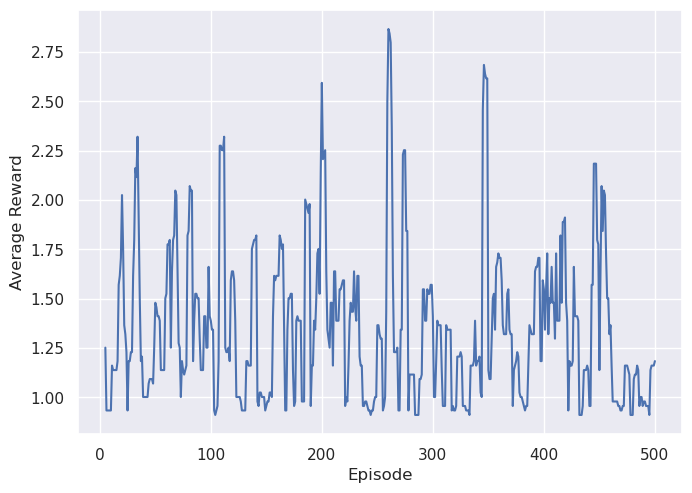

In [313]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})

racecar_df = pd.read_csv("../vista_nautilus/results/CNN/rewards3.csv")
racecar_df['Average Reward'] = racecar_df['Reward'].rolling(window=5).mean()
s = sns.lineplot(data=racecar_df, x="Episode", y="Average Reward")
s.figure.savefig("../vista_nautilus/results/figures/racecar-gym.pdf") 